In [2]:
#importing dependencies

In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [5]:
#importing csv file
df = pd.read_csv("housing.csv")


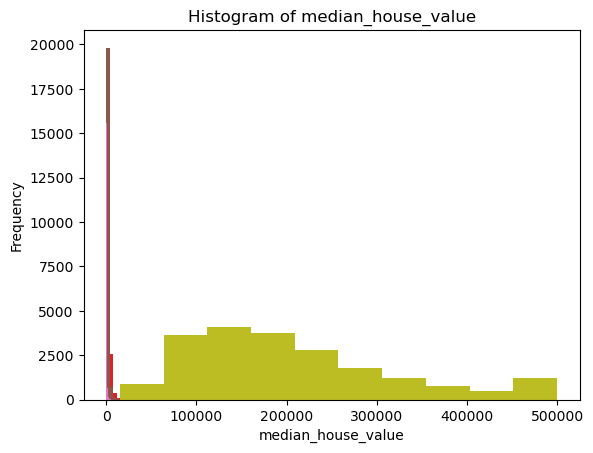

In [6]:
#plotting histograms
column_labels = df.columns.tolist()

# Select the columns for which you want to draw histograms
selected_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income',
                    'median_house_value']

# Plot histograms for the selected columns
for column in selected_columns:
    plt.hist(df[column])
    label = column_labels[df.columns.get_loc(column)]
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {label}')
   # plt.show()

In [7]:
#dropping ocean proximity because its non  numeric
df = df.drop(columns =['ocean_proximity'])


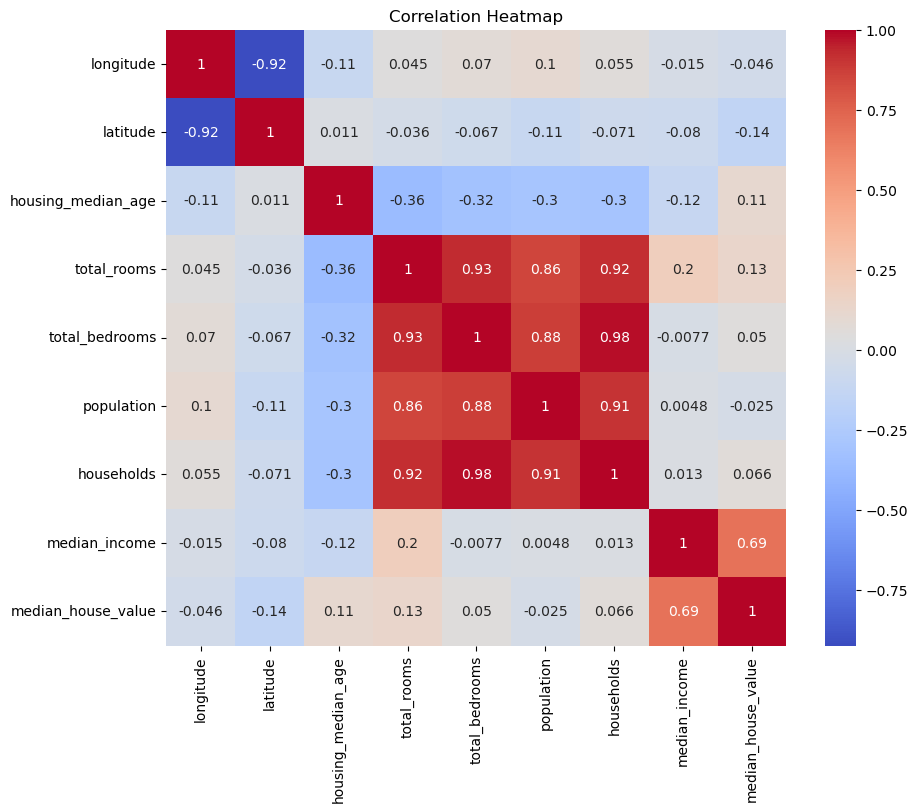

In [8]:
# using heatmaps to show correlation

corr = df.corr() #correlation function
corr
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Additionally we noted that several features (total_rooms, total_bedrooms, population, household: 789 active
# so it's interesting to find out if a removal of a few of them would have any affect on the model pe
# a new feature that is a ratio of the total rooms to households
df [ 'rooms_per_household'] = df [ 'total_rooms']/df [ 'households']
#a new feature that is a ratio of the total bedrooms to the total rooms
df [ 'bedrooms_per_room'] = df [ 'total_bedrooms']/df [ 'total_rooms' ]
#let's combine the latitude and longitude into 1
df [ 'population_per_household'] = df [ 'population']/df [ 'households']
df [ 'coords'] = df [ 'longitude']/df [ 'latitude']

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,-3.067123
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,-3.069385
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,-3.074309
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,-3.076845


In [11]:

#df = df.drop(columns =['total_rooms'])
#df = df.drop(columns =['households'])
#df = df.drop(columns =['total_bedrooms'])
#df = df.drop(columns =['population'])
#df = df.drop(columns =['latitude'])
#df = df.drop(columns =['longitude'])



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
#separating input data
X = df.drop(columns='median_house_value')
#separating output data
y = df['median_house_value']

In [14]:
#split data set into training testing  and VALIDATION sets

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and the linear regression model
model = make_pipeline(imputer, LinearRegression())

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [17]:

from sklearn.metrics import mean_squared_error
# Generate predictions using the trained model
prediction = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, prediction)
